<h1>What is Non-locality?</h1>

It is the "communication" between 2 entangled particles at a distance, at a level that seems faster than the speed of light. For example, suppose we had 2 entangled particles a light second apart (300,000km). We measure the state of the first particle, which has a 50% chance of being 1 state. Less than a second later, we measure the spin of the second particle. If the first particle was measured to be in the 1 state, then the chance of the second particle being in the 0 state is guarenteed. This gives the impression that the state of the particles were predetermined upon being measured, and if there was some communication between the particles, then that infromation would have been sent at a speed faster than light. One could argue that the particles had a predetermined states before seperation, thereby not requiring any communication beforehand.



<h1>What is Contextuality?</h1>

It is the idea that measurements made of quantum observables cannot be thought of as pre-determined. Using the example above, the state of the first particle is NOT pre-determined. Until it was measured, the first particle can be thought of as being in super-position of the 0 and 1 state. Non-locality can be seen as a case of contexuality. 

<h1>A Game</h1>

The CHSH experiment captures this phenomena. Suppose Alice and Bob are each given cards, 'x' and 'y' respectively that contain either a 0 or 1. They need to guess the AND operation done on eachothers given number. Alice and Bob give their answers to a referee, with their responses being 'a' and 'b'. 'a' and 'b' contain either 0 or 1  The condition for them winning is:




>$ x {\wedge} y = a {\oplus} b$
  
Once the game commences, Alice and Bob cannot communicate with anyone, but can arrange a strategy beforehand. If they were playing this game classically, then they would have a 75% chance of guessing correctly. Alice and Bob can settle on saying that they have the same number is they see a 0 and guess randomly if the see a 1, and vise versa. But there's a quantum method that allows them the guess correclty 85% of the time.

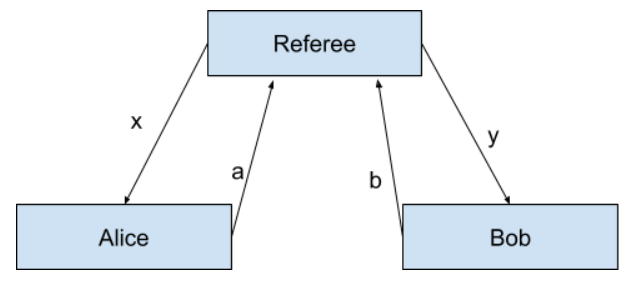



In [ ]:
 !pip install qiskit

In [ ]:
import qiskit
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
from math import pi as pi
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.monitor import job_monitor as job_monitor
%matplotlib inline

print('ok')

ok


The players entangle their qubits, then the game begins:


The referee assigns 1 or 0 to Alice and Bob. Depending on what they receive, they will perform a measurement on their qubit depending in a different basis. If they were to measure their qubits in the same basis, then they will always say that they have the same number, which is only 50% correct. By changing the basis of their measurement depending on their given number, they can increase the probability of winning. It's as if they are "rotating" towards favoring the 0 state. As a consequence, we sacrifice a higher probability of successfully guessing x = y = 1.

We choose to make the angle between the measured basis to be ${\pi}/8$ radians apart, as it should give us the highest chance of guessing correctly. We apply an $R(\theta)$ gate to each qubit, with $\theta$ being dependent on each users given number

$R(\theta) = \begin{bmatrix} -sin{\theta} & sin{\theta} \\ cos{\theta} & cos{\theta} \end{bmatrix}$

For Alice's qubit, we let $\theta = {\pi}/4$ when $x=1$, or do nothing if $x=0$.

For Bob's qubit, we let $\theta = {\pi}/8$ if  $y=1$, or, $\theta=-{\pi}/8$ if $y=0$

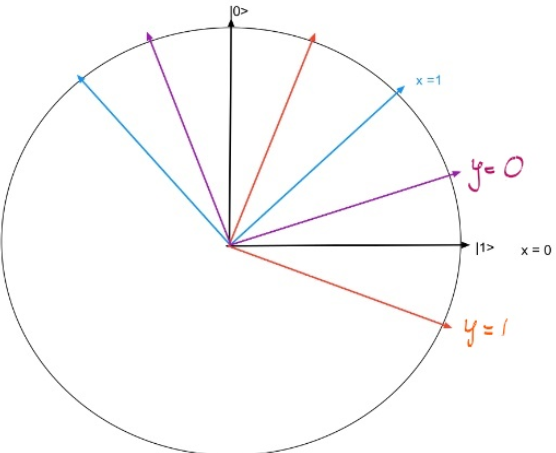




In [ ]:
#alice = QuantumRegister(1, name='alice')
#bob = QuantumRegister(1, name='bob')
#c_alice = ClassicalRegister(1, name='c_alice')
#c_bob = ClassicalRegister(1, name='c_bob')

chsh = QuantumCircuit(2,2)

chsh.h(0)
chsh.cx(0, 1)

chsh.draw()

#please be sensible and type in only 0 or 1 then hit enter immediately, ty <3
alice_state = int(input('Assign Alice 1 or 0: '))
bob_state = int(input('Assign Bob 1 or 0: '))

if alice_state == 0:
  chsh.i(0)
elif alice_state == 1:
  chsh.rx(pi/4,0)
else:
  print("huh?")

if bob_state == 0:
  chsh.rx(-pi/8,1)
elif bob_state == 1:
  chsh.rx(pi/8,1)
else:
  print("huh?")

print(chsh)
###hot fix: y = 0 and y = 1. the code, image, and text are correct now :)



Assign Alice 1 or 0: 0
Assign Bob 1 or 0: 0
     ┌───┐         ┌───┐    
q_0: ┤ H ├──■──────┤ I ├────
     └───┘┌─┴─┐┌───┴───┴───┐
q_1: ─────┤ X ├┤ RX(-pi/8) ├
          └───┘└───────────┘
c: 2/═══════════════════════
                            


Now we measure

[ 6.93519923e-01+0.j          8.44698229e-18+0.13794969j
 -8.44698229e-18+0.13794969j  6.93519923e-01+0.j        ]


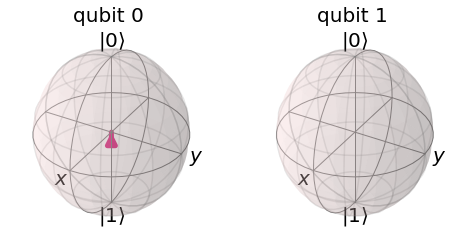

In [ ]:

simulator = qiskit.Aer.get_backend('statevector_simulator')
job = qiskit.execute(chsh, simulator)
results = job.result()

chsh.measure([0,1],[0,1])
print(results.get_statevector(chsh))
plot_bloch_multivector(results.get_statevector(chsh))


{'00': 473, '01': 28, '10': 21, '11': 502}


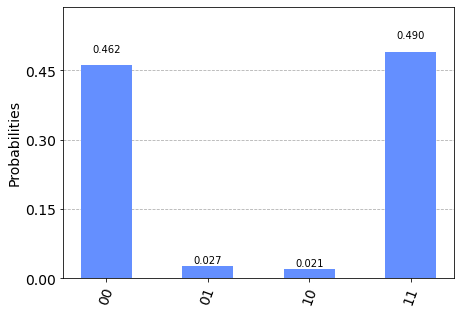

In [ ]:
backend_sim = qiskit.Aer.get_backend('qasm_simulator')
job_sim = qiskit.execute(chsh, backend_sim, shots=1024)
results = job_sim.result().get_counts()
print(job_sim)
print(results)
plot_histogram(results)
